In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [4]:
df.shape

(9800, 18)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
df=df.dropna().copy()


In [8]:
df["Order Date"] = pd.to_datetime(df["Order Date"],dayfirst=True,errors="coerce")

In [9]:
#Total Sales

In [10]:
total_sales=df["Sales"].sum()
total_sales

np.float64(2252607.4127)

In [11]:
#Category-wise Sales Analysis

In [12]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
category_sales

Category
Technology         825856.1130
Furniture          723538.4757
Office Supplies    703212.8240
Name: Sales, dtype: float64

In [13]:
#Category-wise Sales Visualization

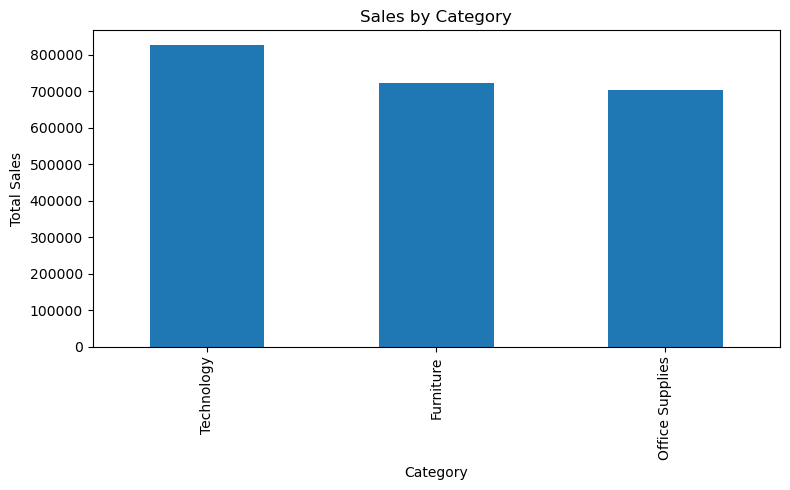

In [14]:
category_sales.plot(kind="bar",figsize=(8,5))
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

In [15]:
# Region-wise Sales Analysis

In [16]:
region_sales=df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
region_sales

Region
West       710219.6845
East       660589.3560
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

In [17]:
# Region-wise sales visualization

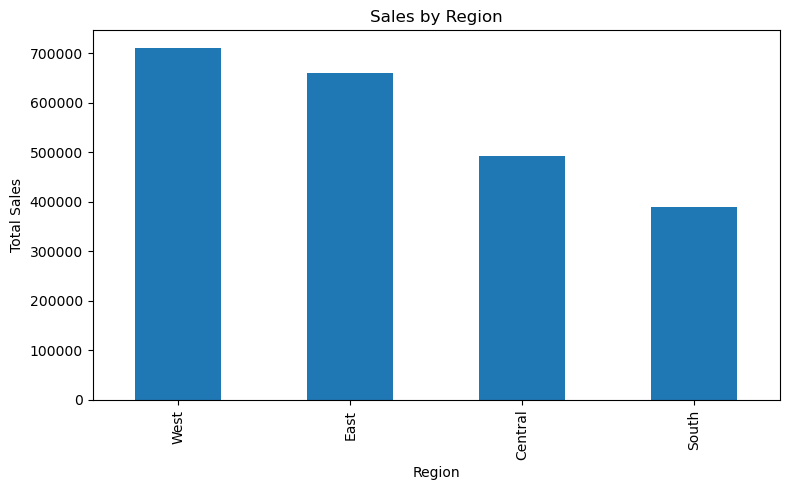

In [18]:
region_sales.plot(kind="bar",figsize=(8,5))
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

In [19]:
#Monthly Sales Trend

In [20]:
df["Month"]=df["Order Date"].dt.to_period("M")
monthly_sales=df.groupby("Month")["Sales"].sum()
monthly_sales

Month
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     70129.2995
2016-12     74543.6012
2017-01     16870.1810
2017-02     22978.8150
2017-03     51165.0590
2017-04     37385.0170
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     42839.2940
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040
2018-

In [21]:
#Monthly Sales Visualization

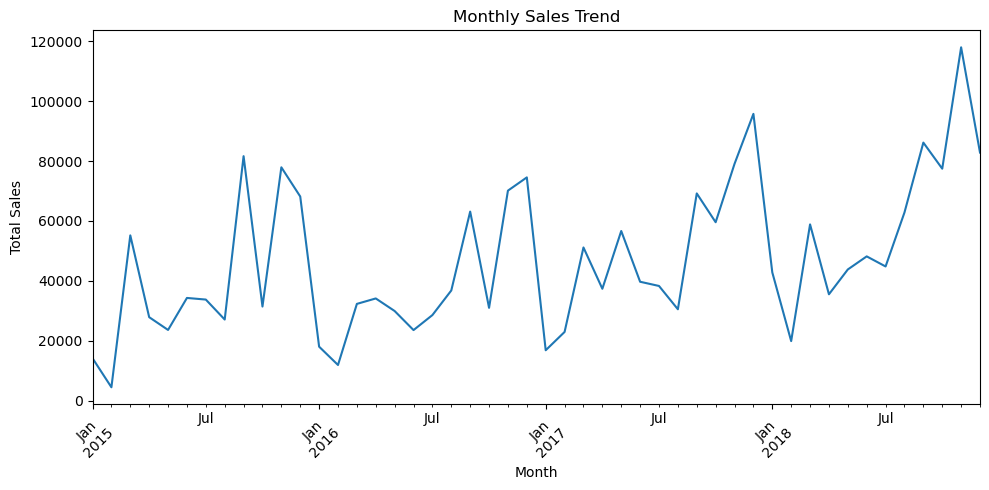

In [22]:
monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()